In [17]:
#Basit bir yapay sinir ağından başlıyoruz.

import numpy as np
import matplotlib.pyplot as plt

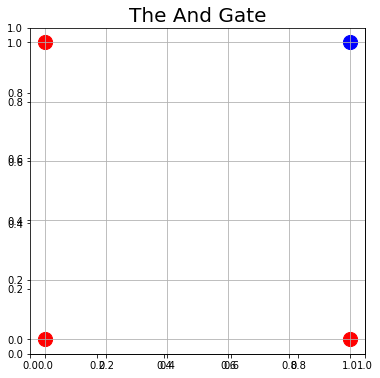

In [18]:
from matplotlib import pyplot as plt

#And gate diye tabir edilen ve kapısı.Girdilere göre çıktıları üretecek bir
#yapay sinir ağı yapacağız.
#Bu problem lineer olarak ayrılabilir yani iki farklı gruba bir doğru çektiğimizde
#birbirinden ayırabilirmiyiz evet.
#Bu bir sınıflandırma problemimidir.Çünkü 0-0 verdiğimizde Bize çıktı üretirken
#sınıflandırmadır.İkili sınıflandırmadır.

area=200
fig = plt.figure(figsize=(6,6))
plt.title('The And Gate',fontsize=20)
ax = fig.add_subplot(111)


ax.scatter(0,0,s=area,c='r',label="Class 0")
ax.scatter(0,1,s=area,c='r',label="Class 0")
ax.scatter(1,0,s=area,c='r',label="Class 0")
ax.scatter(1,1,s=area,c='b',label="Class 1")

plt.grid()
plt.show()


In [19]:
#Binary cross entropy fonksiyonumuz:
#Olması gereken değer*Fonksiyonun tahmini + (1-Olması gereken değer)*log(1-Fonksiyonun tahmini)

#Output yani y değerinin 1 olması durumunda: sağ kısım iptal çünkü 1-olm.gereken değer = 0
#olacağından o kısım 0 olur. Bizede sadece Olması gereken değer*log(tahmin) kalır.
#Olması gereken değer 1 olduğu için 1 ile çarpmaya gerek duyulmamış.

#Olması gereken değer yani y 0 olması durumunda:0'sa sol taraf gidiyordu.
#Geriye (1-olması gereken)*log(1-tahmin) kalıyor.y=olması gereken = 0 koyunca
#log(1-tahmin) kalıyor.

#Binary cross entropy fonksiyonumuz.
def crossEntropy(y_pred,y):
    if y==1:
        return -np.log(y_pred)
    else:
        return -np.log(1-y_pred)

#z:Ağırlıklarla girdilerin çarpılıp toplanmasından elde edilen değere z diyoduk.
#z değerini sigmoid fonksiyonuna göndereceğiz.Oda bize çıktı üretecek.
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [20]:
#Geri yayılımda türevler lazım.
#Cross entropy'nin türevini almışız

def derivativeCrossEntropy(y_pred,y):
    if y==1:
        return -1/y_pred
    else:
        return 1/(1-y_pred)

#Sigmoidin türevide x*(1-x)'tir.'
def derivativeSigmoid(x):
    return x*(1-x)

In [21]:
#Girdiler ve çıktıları belirlememiz lazım.
#Girdi sayımız biası saymazsak 2'dir.And kapısınında girdisi 2.Biasla beraber
#3 adet girdimiz olması gerekir.

X=np.array([[0,0],[0,1],[1,0],[1,1]])

#Olması gereken çıktılar.
Y=np.array([0,0,0,1])

#Ağırlıkları belirlememiz lazım.Bir adet nöron kullanacağız.
#Ağırlıkları belirlerkende -0.01 ile +0.01 arasında yapacağız.

low=-0.01
high=0.01

#W2 2. girdinin ağırlığı
W_2=np.random.uniform(low=low,high=high,size=(1,))
#W1 1.girdinin ağırlığı
W_1=np.random.uniform(low=low,high=high,size=(1,))
#W0 biasın ağırlığı
W_0=np.random.uniform(low=low,high=high,size=(1,))

print(W_0,W_1,W_2)


[-0.00597174] [-0.00636906] [0.00587981]


In [22]:
#Epoch boyunca bu modeli eğitmemiz lazım.
#Gradient distantın ileri geri ileri geri yayılması gerekiyor.Bi epok belirledik
#2000.Öğrenme katsayımız 0.01 bunu ağırlıkları güncellerken kullanıyoruz.
#Rastgele indexler oluşuturduk çünkü ([[0,0],[0,1],[1,0],[1,1]]) bu değerleri
#Sırayla [0,0] [0,1] şeklinde vermektense her seferinde rastgele indexten oluşan
#bir sistemle yapıyoruz.

epoch=2000
lr_rate=0.01
random_index=np.arange(X.shape[0])

np.random.shuffle(random_index)
print(random_index)
X.shape
#X.shape (4,2) 4 tane veri var. 4 satır 2 sütundan oluşan veri.
#X.shape[0] = 4 olmuş oluyo.
#Her seferinde karıştırıp indexleri veriyor.Bunu 2000 epoch boyunca çalıştıracağız
#ve karıştırarak modele öğreteceğiz.

[2 0 3 1]


(4, 2)

In [23]:
#Hataları tutmak için bir liste oluşturduk.
E=[]
for e in range(epoch):
    
    random_index=np.arange(X.shape[0])
    
    np.random.shuffle(random_index)
    #İndex bazında,epoch bazında hataları tutmak için e listesi.
    e=[]
    
    #ilk önce random indexin içindeki indexleri sırasıyla alıyoruz.
    #3ü aldık diyelim 3'ün içinde 1,0 var.
    
    
    for i in random_index:
        x=X[i]
        
        #x[0] 1 oluyor, x[1] ise 0.
        #W'ları rastgele atmıştık.
        Z=W_1*x[0] + W_2*x[1]+W_0
        
        #Z değerini sigmoide gönderiyoruz.Buda bir tahmin üretecek.
        Y_pred = sigmoid(Z)
        
        #Sonrasında crossEntropy fonksiyonuna olması gereken Y[i] değeriyle
        #kendi tahminimizi gönderiyoruz.Gelen hatayıda e'ye ekliyoruz.
        e.append(crossEntropy(Y_pred,Y[i]))
        
        #W1 için zincir kuralıyla hesaplıyoruz.
        #Maliyet fonksiyonunun türevi ve sigmoid fonksiyonunun türevi * x[0]'ın kendi değeri.
        dEdW_1=derivativeCrossEntropy(Y_pred,Y[i])*derivativeSigmoid(Y_pred)*x[0]
        dEdW_2=derivativeCrossEntropy(Y_pred,Y[i])*derivativeSigmoid(Y_pred)*x[1]
        #W0 biastı.
        dEdW_0=derivativeCrossEntropy(Y_pred,Y[i])*derivativeSigmoid(Y_pred)
        
        #Sonrasında ağırlıkları güncelliyoruz.
        #dEdW dediğimiz W_0'ın kısmi türevi.
        W_0=W_0-lr_rate*dEdW_0
        W_1=W_1-lr_rate*dEdW_1
        W_2=W_2-lr_rate*dEdW_2
        
    #Tüm epoch boyunca elde ettiğimiz error'un ortalamasını iterasyon boyunca e değerine
    #atıyoruz.İterasyon sonucunda elde ettiğimiz W1'lerle çıktılar arasında fark varmı.
    E.append(np.mean(e))

print(W_0,W_1,W_2)
print("Bitti")    
        

[-4.26863004] [2.69297058] [2.69331243]
Bitti


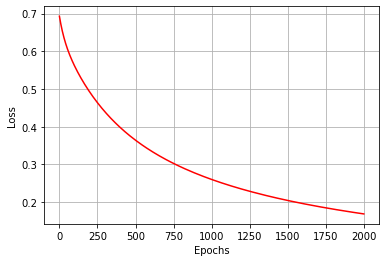

In [24]:
plt.figure()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(E,c='r')
plt.show()

In [26]:
#Modelimizi test etmek istiyoruz.

#Test fonksiyonumuzda x1 ve x2'yi veriyoruz.Bulduğumuz W değerleriyle bunları
#çarpıyoruz.Sigmoide sokuyoruz.Tahminimiz 0.5'ten küçükse 0, değilse 1 yazıcak.
#Her biri için modeli tek tek test ediyoruz. 
def test_model(x1,x2):
    
    Z=W_1*x1 + W_2*x2 + W_0
    y_pred = sigmoid(Z)
    
    if(y_pred<0.5):
        print(0)
    
    else:
        print(1)

In [27]:
test_model(0,1)
test_model(1,0)
test_model(1,1)
test_model(0,0)

0
0
1
0


In [ ]:
#Burada tek bir nörondan oluşan tek bir and kapısı yaptık.Tahminlerde doğru çalışıyor.